# 程式設計專題

## 主題：最近地震資訊
## 動機：今年發生403大地震，餘震頻繁，藉此機會製作此主題。

### 組員：黃子芹、鄭婕紷

In [ ]:
# 測試能否爬蟲

# 載入 Selenium 相關模組
from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.chrome.options import Options
import requests
from bs4 import BeautifulSoup


# 設定 Chrome Driver 的執行路徑
options = Options()
options.chrome_executable_path="C:\\Users\\88698\\OneDrive\\桌面\\程式設計(二)\\專題.txt"

# 建立 Driver 物件實體，用程式操作瀏覽器運作
driver = webdriver.Chrome(options=options)

# 連線到"中央氣象署 地震測報中心"
driver.get("https://www.cwa.gov.tw/V8/C/E/index.html")


# 搜尋 class 屬性是 eq_lv-1 的所有標籤
details = driver.find_elements(By.CLASS_NAME,"eq-detail")

# 取得地震詳細資訊
for detail in details:
    print(detail.text)


driver.close()




06/25 22:26
點我看更多
地點
宜蘭縣政府南南東方43.1公里
(位於臺灣東部海域)
深度17.8km
地震規模3.8
06/25 20:21
點我看更多
地點
花蓮縣政府北北東方22.6公里
(位於花蓮縣近海)
深度14.6km
地震規模3.4
06/25 10:19
點我看更多
地點
臺南市政府北北西方25.9公里
(位於臺南市將軍區)
深度12km
地震規模3.8
06/24 08:40
點我看更多
地點
花蓮縣政府北北東方17.7公里
(位於花蓮縣近海)
深度7.4km
地震規模4.0
06/24 07:03
點我看更多
地點
花蓮縣政府南南西方18.0公里
(位於花蓮縣壽豐鄉)
深度6.5km
地震規模3.2
06/23 22:27
點我看更多
地點
花蓮縣政府南方18.3公里
(位於花蓮縣近海)
深度17km
地震規模5.4
06/23 03:01
點我看更多
地點
花蓮縣政府北北東方21.2公里
(位於花蓮縣近海)
深度13.2km
地震規模3.4
06/22 20:53
點我看更多
地點
花蓮縣政府北北東方4.8公里
(位於花蓮縣近海)
深度24.2km
地震規模3.6
06/22 15:05
點我看更多
地點
宜蘭縣政府南方37.2公里
(位於宜蘭縣近海)
深度10.2km
地震規模3.1
06/22 05:41
點我看更多
地點
花蓮縣政府北北東方17.2公里
(位於花蓮縣近海)
深度14.2km
地震規模3.7
06/21 23:16
點我看更多
地點
花蓮縣政府東北方21.6公里
(位於臺灣東部海域)
深度29.9km
地震規模3.9
06/21 15:57
點我看更多
地點
花蓮縣政府南南東方9.0公里
(位於花蓮縣近海)
深度37.2km
地震規模4.2
06/21 12:25
點我看更多
地點
花蓮縣政府南方55.4公里
(位於花蓮縣近海)
深度40.2km
地震規模4.6
06/21 10:54
點我看更多
地點
花蓮縣政府南南西方18.2公里
(位於花蓮縣壽豐鄉)
深度27.6km
地震規模3.8
06/21 06:52
點我看更多
地點
花蓮縣政府北北東方26.2公里
(位於花蓮縣近海)
深度15km
地震規模3.6


In [187]:
# 爬蟲後將檔案解析

from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.chrome.options import Options
import re

options = Options()
options.chrome_executable_path = "C:\\path\\to\\chromedriver.exe"  # Replace with your actual ChromeDriver path

driver = webdriver.Chrome(options=options)
driver.get("https://www.cwa.gov.tw/V8/C/E/index.html")

details = driver.find_elements(By.CLASS_NAME, "eq-detail")

earthquake_data = ""
for detail in details:
    earthquake_data += detail.text + "\n"

driver.quit()  # 取得資料後關閉瀏覽器

# 解析資料
entries = re.split(r'\d{2}/\d{2} \d{2}:\d{2}', earthquake_data)[1:]
timestamps = re.findall(r'\d{2}/\d{2} \d{2}:\d{2}', earthquake_data)

# 提取需要的資訊(時間、地點、深度、規模)
earthquakes = []
for i, entry in enumerate(entries):
    location_match = re.search(r'地點\s(.*)', entry)
    depth_match = re.search(r'深度(\d+\.\d+)km', entry)
    magnitude_match = re.search(r'地震規模(\d+\.\d+)', entry)
    
    if location_match and depth_match and magnitude_match:
        location = location_match.group(1).strip()
        depth = float(depth_match.group(1))
        magnitude = float(magnitude_match.group(1))
        earthquakes.append({
            'datetime': timestamps[i],
            'location': location,
            'depth': depth,
            'magnitude': magnitude
        })

# 顯示前十筆資料，看是否有抓取正確
for eq in earthquakes[:10]:
    print(f"{eq['datetime']}, {eq['location']}, {eq['depth']}, {eq['magnitude']}")


06/25 22:26, 宜蘭縣政府南南東方43.1公里, 17.8, 3.8
06/25 20:21, 花蓮縣政府北北東方22.6公里, 14.6, 3.4
06/24 08:40, 花蓮縣政府北北東方17.7公里, 7.4, 4.0
06/24 07:03, 花蓮縣政府南南西方18.0公里, 6.5, 3.2
06/23 03:01, 花蓮縣政府北北東方21.2公里, 13.2, 3.4
06/22 20:53, 花蓮縣政府北北東方4.8公里, 24.2, 3.6
06/22 15:05, 宜蘭縣政府南方37.2公里, 10.2, 3.1
06/22 05:41, 花蓮縣政府北北東方17.2公里, 14.2, 3.7
06/21 23:16, 花蓮縣政府東北方21.6公里, 29.9, 3.9
06/21 15:57, 花蓮縣政府南南東方9.0公里, 37.2, 4.2


In [ ]:
# 將爬蟲後的檔案轉成 xlsx檔

from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.chrome.options import Options
import re
import pandas as pd

# 設定 Chrome Driver 的執行路徑
options = Options()
options.chrome_executable_path = "C:\\path\\to\\chromedriver.exe"  # 替換成你的 ChromeDriver 路徑

# 建立 Driver 物件實體，用程式操作瀏覽器運作
driver = webdriver.Chrome(options=options)

# 連線到"中央氣象署 地震測報中心"
driver.get("https://www.cwa.gov.tw/V8/C/E/index.html")

# 搜尋 class 屬性是 eq-detail 的所有標籤
details = driver.find_elements(By.CLASS_NAME, "eq-detail")

# 取得地震詳細資訊並印出
earthquake_data = ""
for detail in details:
    earthquake_data += detail.text + "\n"

# 關閉瀏覽器視窗
driver.quit()

# 解析資料
entries = re.split(r'\d{2}/\d{2} \d{2}:\d{2}', earthquake_data)[1:]
timestamps = re.findall(r'\d{2}/\d{2} \d{2}:\d{2}', earthquake_data)

# 提取需要的資訊
earthquakes = []
for i, entry in enumerate(entries):
    location_match = re.search(r'地點\s(.*)', entry)
    depth_match = re.search(r'深度(\d+\.\d+)km', entry)
    magnitude_match = re.search(r'地震規模(\d+\.\d+)', entry)
    
    if location_match and depth_match and magnitude_match:
        location = location_match.group(1).strip()
        depth = float(depth_match.group(1))
        magnitude = float(magnitude_match.group(1))
        earthquakes.append({
            'datetime': timestamps[i],
            'location': location,
            'depth': depth,
            'magnitude': magnitude
        })

# 轉換成 pandas 的 DataFrame
df = pd.DataFrame(earthquakes)

# 將資料存成 Excel 檔案
excel_filename = "earthquake_data.xlsx"
df.to_excel(excel_filename, index=False)

print(f"資料已存成 {excel_filename}")


資料已存成 earthquake_data.xlsx


In [191]:
# 網頁透過Flask-Alchemy連接資料庫
from flask import Flask
from flask_sqlalchemy import SQLAlchemy

# create the extension
db = SQLAlchemy()
# create the app
app = Flask(__name__)

# DB First: 先在SQL Server建立資料庫testdb1
# app.config['SQLALCHEMY_DATABASE_URI'] = 'mssql+pyodbc://<username>:<password>@<dsn>'
# 在 URL 中，+ 符號常用於表示空格。當您需要在連線字串中表示空格時，可以使用 + 代替。
# 例如，ODBC+Driver+17+for+SQL+Server 表示 "ODBC Driver 17 for SQL Server"。

# 在 URL 中，& 符號用於分隔不同的參數或屬性。它用於將多個參數連接在一起。
# 例如，param1=value1&param2=value2 表示兩個參數 param1 和 param2，以及它們對應的值 value1 和 value2。

# 在連線字串中，& 符號用於指定不同的連接參數，如驅動程式參數、身份驗證方式、伺服器名稱等。
# 它們以 key=value 的形式出現，並使用 & 連接多個參數。
# 先在SQL Server建立資料庫testdb1

# app.config['SQLALCHEMY_DATABASE_URI'] = 'mssql+pyodbc:///?driver=ODBC+Driver+17+for+SQL+Server&trusted_connection=yes&server=.&database=testdb1'

app.config['SQLALCHEMY_DATABASE_URI'] = 'mssql+pyodbc:///?' \
'driver=ODBC+Driver+17+for+SQL+Server&' \
'trusted_connection=yes&' \
'server=HZQIN__&' \
'database=testdb1'

# initialize the app with the extension
db.init_app(app)

# 建立模型
# 建立資料表
# 物件導向概念
# 建立類別，第—個字元建議使用大寫字元。
# 類別語法 class 類別名稱(): 
# 白話文：a class is a set
# Members in a class correspond to elements i a set

# 類別可以繼承，被繼承的類別稱為父類別（parent class）或
# 基底類別（base class），繼承的類別稱為子類別（child class）
# 或行生類別（derived class），子類別可以繼承父類別中所有共用屬性和
# 共用方法。
# 建立子類別的語法：class 類別名稱(父類別):
# 建立一個 earthquake 的資料模型類別（資料表），該類別繼承
#  db.Model，代表使用 Flask-Alchemy 框架。 

class earthquake(db.Model):
    __tablename__='earthquake' # 在資料庫testdb1建立資料表earthquake
    
    # db.Column: 這是使用 Flask-Alchemy 時定義欄位的方式，
    # 它表示在資料庫表格中的一個欄位。
    # db.Integer: 這個欄位的資料類型為整數。
    # primary_key = True: 這個參數表示 sid 欄位是主鍵
    # (primary key)。主鍵是資料表格中的一個唯一識別符號，
    # 用於確保每筆資料的唯一性並提供快速查詢的能力。

    sid = db.Column(db.Integer, primary_key = True)

    # db.String(50): 欄位資料類型為字串 (string)，並且限制長度為
    # 最多 50 個字元。中文字在 UTF-8 編碼下佔用 3 個位元組，
    # db.String(50)，可以存儲約 16 個中文字。
    # nullable = False: name 欄位不允許為空值。

    time = db.Column(db.String(50), nullable = False)
    place= db.Column(db.String(50))
    depth = db.Column(db.String(200))
    scale = db.Column(db.String(100))

    # 建立類別時必須對類別初始化，必須建立一個特殊的方法：
    # 類別的建構函式把類別變成函式
    # __init()__，這個初始化的方法稱為建構函式，建立建構式的語法：
    # def = __init _ (self[, 參數1, 參數2,... ]):
    # 建構式必須使用__init__() 函式，參數self 是必須的，
    # 同時需要放在最前面，代表建立的物件， 其餘的參數是可選擇性的。
    # 如此在類別中就可以self.屬性丶self.方法執行類別的屬性利方法。

    # 建構函式 (constructor)，當您創建一個 students 物件時，
    # 會自動調用這個建構函式。這個建構函式接受四個參數：
    # name、tel、addr、email。self.name = name: 在建構函式內部，
    # 透過這些語句將傳入的參數值賦值給物件的屬性。
    # self.name 表示物件的 name 屬性，而 name 則是建構函式的參數。
    # 這樣做可以將傳入的值儲存在物件內部，以便稍後在程式中使用。

    def __init__(time, place, depth, scale):
        self.time = time
        self.place = place
        self.depth = depth
        self.scale = scale

# 以上類別建好
with app.app_context():
    db.drop_all()   #如果資料表已存在就刪除
    db.create_all() # #新增資料表
print('資料庫連線成功！')
app.run()


資料庫連線成功！
 * Serving Flask app '__main__'
 * Debug mode: off


 * Running on http://127.0.0.1:5000
Press CTRL+C to quit


In [ ]:
from flask import Flask
from flask_sqlalchemy import SQLAlchemy

# create the app
app = Flask(__name__)

app.config['SQLALCHEMY_DATABASE_URI'] = 'mssql+pyodbc:///?' \
'driver=ODBC+Driver+17+for+SQL+Server&' \
'trusted_connection=yes&' \
'server=HZQIN__&' \
'database=testdb1'

# initialize the app with the extension
db = SQLAlchemy(app)

class earthquake(db.Model):
    __tablename__ = 'earthquake' 
    sid = db.Column(db.Integer, primary_key=True)
    time = db.Column(db.String(50), nullable=False)
    place = db.Column(db.String(100))
    depth = db.Column(db.String(50))
    scale = db.Column(db.String(50))

    def __init__(self, time, place, depth, scale):
        self.time = time
        self.place = place
        self.depth = depth
        self.scale = scale

with app.app_context():
    db.drop_all()   #如果資料表已存在就刪除
    db.create_all() # #新增資料表
print('資料庫連線成功！')
app.run()


資料庫連線成功！
 * Serving Flask app '__main__'
 * Debug mode: off


 * Running on http://127.0.0.1:5000
Press CTRL+C to quit


In [192]:
# 將Excel檔讀取為dataframe
import pandas as pd

# 設定正確的Excel檔案路徑
excel_file = r'C:\Users\88698\OneDrive\桌面\程式設計(二)\earthquake_data.xlsx'

# 讀取Excel檔案並轉換為DataFrame
df = pd.read_excel(excel_file)

# 印出DataFrame的前10行來確認讀取正確
print(df.head(10))



      datetime         location  depth  magnitude
0  06/25 22:26  宜蘭縣政府南南東方43.1公里   17.8        3.8
1  06/25 20:21  花蓮縣政府北北東方22.6公里   14.6        3.4
2  06/24 08:40  花蓮縣政府北北東方17.7公里    7.4        4.0
3  06/24 07:03  花蓮縣政府南南西方18.0公里    6.5        3.2
4  06/23 03:01  花蓮縣政府北北東方21.2公里   13.2        3.4
5  06/22 20:53   花蓮縣政府北北東方4.8公里   24.2        3.6
6  06/22 15:05    宜蘭縣政府南方37.2公里   10.2        3.1
7  06/22 05:41  花蓮縣政府北北東方17.2公里   14.2        3.7
8  06/21 23:16   花蓮縣政府東北方21.6公里   29.9        3.9
9  06/21 15:57   花蓮縣政府南南東方9.0公里   37.2        4.2


In [193]:
# 將檔案存到SQL中

from flask import Flask
from flask_sqlalchemy import SQLAlchemy
import pandas as pd
from sqlalchemy import create_engine
from sqlalchemy.orm import sessionmaker

# 建立 Flask 應用
app = Flask(__name__)

# 配置 SQL 資料庫連接資訊（根據實際情況修改）
app.config['SQLALCHEMY_DATABASE_URI'] = 'mssql+pyodbc:///?' \
    'driver=ODBC+Driver+17+for+SQL+Server&' \
    'trusted_connection=yes&' \
    'server=HZQIN__&' \
    'database=testdb1'

# 初始化 SQLAlchemy 擴展
db = SQLAlchemy(app)

# 定義地震資料模型
class Earthquake(db.Model):
    __tablename__ = 'earthquake' 
    sid = db.Column(db.Integer, primary_key=True)
    datetime = db.Column(db.String(50), nullable=False)  # 合併後的日期時間欄位
    place = db.Column(db.String(100))
    depth = db.Column(db.String(50))
    scale = db.Column(db.String(50))

    def __init__(self, datetime, place, depth, scale):
        self.datetime = datetime
        self.place = place
        self.depth = depth
        self.scale = scale

# 在 Flask 上下文中操作資料庫
with app.app_context():
    try:
        # 刪除現有的資料表（如果存在）
        db.drop_all()
        # 創建資料表
        db.create_all()

        # 創建資料庫引擎和會話
        engine = create_engine(app.config['SQLALCHEMY_DATABASE_URI'])
        Session = sessionmaker(bind=engine)
        session = Session()

        # 從 Excel 檔案讀取資料
        excel_file = 'earthquake_data.xlsx'
        df = pd.read_excel(excel_file)

        # 將資料逐行添加到資料庫
        for index, row in df.iterrows():
            earthquake_data = Earthquake(
                datetime=row['datetime'],
                place=row['location'],  # 修改為對應的列名
                depth=str(row['depth']),  # 確保深度欄位的數值轉換為字串存儲
                scale=str(row['magnitude'])  # 確保規模欄位的數值轉換為字串存儲
            )
            session.add(earthquake_data)

        # 提交更改到資料庫
        session.commit()
        print('資料導入成功！')

    except Exception as e:
        print(f'導入資料時出錯：{e}')


資料導入成功！


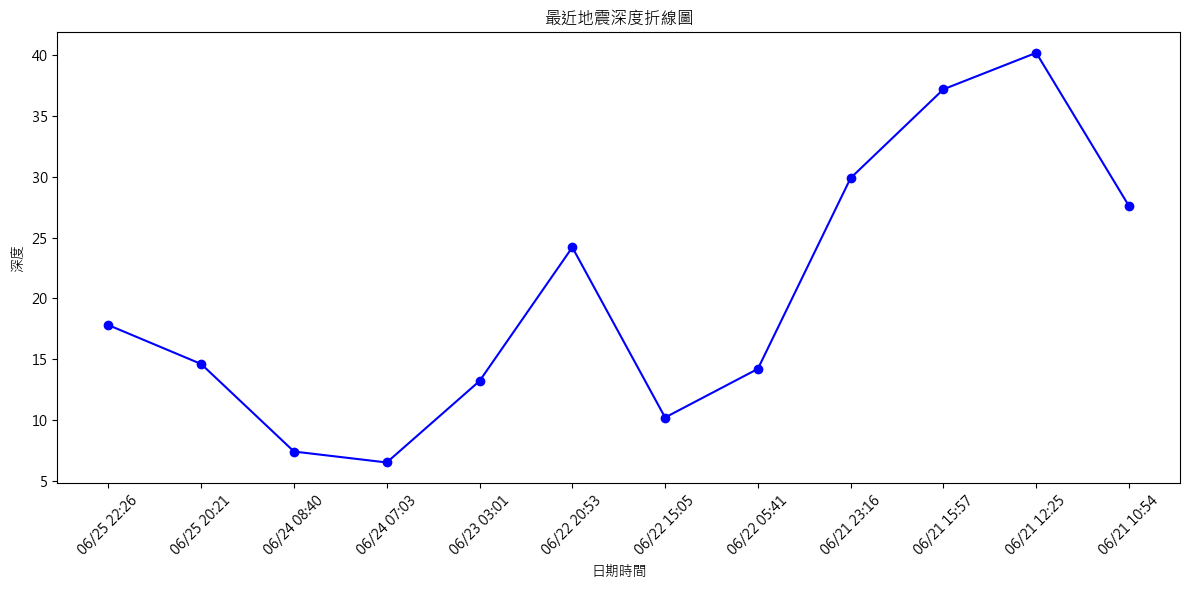

In [194]:
# 繪畫視覺圖

import matplotlib.pyplot as plt

# 設置繁體中文字型，使用微軟正黑體
plt.rcParams['font.sans-serif'] = ['Microsoft JhengHei']
plt.rcParams['axes.unicode_minus'] = False  # 解決負號'-'顯示為方塊的問題

# 假設 df 包含 datetime 和 depth 兩個欄位

plt.figure(figsize=(12, 6))  # 設置圖形大小，這裡寬度為12英寸，高度為6英寸

plt.plot(df['datetime'], df['depth'], marker='o', linestyle='-', color='b')  # 繪製折線圖，設置藍色實線和圓點標記
plt.xlabel('日期時間')  # 設置 x 軸標籤
plt.ylabel('深度')  # 設置 y 軸標籤
plt.title('最近地震深度折線圖')  # 設置圖形標題
plt.xticks(rotation=45)  # 旋轉 x 軸標籤，以避免重疊
plt.tight_layout()  # 自動調整子圖參數，使標籤不重疊

# 儲存圖表到文件中，可以指定不同的圖片格式，例如 PNG、JPG、PDF 等
plt.savefig('earthquake_depth_line_plot.png', dpi=300)  # 儲存為 PNG 格式，設置 DPI 為 300
plt.show()  # 顯示圖形





In [190]:
# 建立網頁

from flask import Flask, render_template_string, send_file
import pandas as pd
from PIL import Image

app = Flask(__name__)

# Excel 和 PNG 檔案的路徑
excel_path = r"C:\Users\88698\OneDrive\桌面\程式設計(二)\earthquake_data.xlsx"
png_path = r"C:\Users\88698\OneDrive\桌面\程式設計(二)\earthquake_depth_line_plot.png"

# HTML 模板
html_template = """
<!doctype html>
<html lang="en">
  <head>
    <meta charset="utf-8">
    <meta name="viewport" content="width=device-width, initial-scale=1, shrink-to-fit=no">
    <title>最新地震資訊</title>
  </head>
  <body>
    <h1>最新地震資訊</h1>
    <h2>最近地震列表</h2>
    <div>
      {{ table|safe }}
    </div>
    <h2>震度變化</h2>
    <div>
      <img src="/image" alt="震度變化" style="max-width: 50%;">
    </div>
  </body>
</html>
"""

@app.route('/')
def index():
    # 讀取 Excel 文件並轉換為 HTML 表格
    df = pd.read_excel(excel_path)
    table = df.to_html()
    return render_template_string(html_template, table=table)

@app.route('/image')
def image():
    # 處理 PNG 圖片並縮小至50%
    img = Image.open(png_path)
    width, height = img.size
    new_width = int(width * 0.5)
    new_height = int(height * 0.5)
    resized_img = img.resize((new_width, new_height))
    
    # 將圖片保存為臨時文件
    temp_png_path = "earthquake_depth_line_plot_resized.png"
    resized_img.save(temp_png_path)
    
    # 發送縮小後的 PNG 圖片
    return send_file(temp_png_path, mimetype='image/png')

if __name__ == '__main__':
    app.run(host='172.20.10.2', port=5000, debug=False)


 * Serving Flask app '__main__'
 * Debug mode: off


 * Running on http://172.20.10.2:5000
Press CTRL+C to quit
172.20.10.2 - - [26/Jun/2024 15:25:25] "GET / HTTP/1.1" 200 -
172.20.10.2 - - [26/Jun/2024 15:25:25] "GET /image HTTP/1.1" 200 -
172.20.10.2 - - [26/Jun/2024 15:25:25] "GET /favicon.ico HTTP/1.1" 404 -


# 心得
## 我們在做這份專題時遇到很多困難，有很多我們不理解的東西要自己上網摸索或是問chat gpt，雖然過程很坎坷花了很多時間，但最後做出來很有成就感，也讓我們學到基礎的網頁設置和爬蟲的技巧。總歸來講，還是要好好上課，跟著教授一步一腳印會有更大的收穫，也不會花更多時間完成。